In [34]:
import pandas as pd 
import numpy as np 
import os 
import tensorflow as tf 
import tensorflow_addons as tfa
from tensorflow import keras 
import matplotlib.pyplot as plt
import cv2 
from glob import glob

import parameters
import dataset_generator 

# import data

In [1]:
gpus = []
for gpu in range(int(0)):
    gpus.append(f'/GPU:{gpu}')
    
gpus

[]

In [35]:
base_models_path = 'C:/Users/user/Desktop/models/child_skin_classification_infection'
# dataset = 'C:/Users/user/Desktop/datasets/Child Skin Disease/Total_Dataset'
base_path = 'E:/Child Skin Disease(part)'
dataset_path = os.path.join(base_path, 'Total_Dataset')

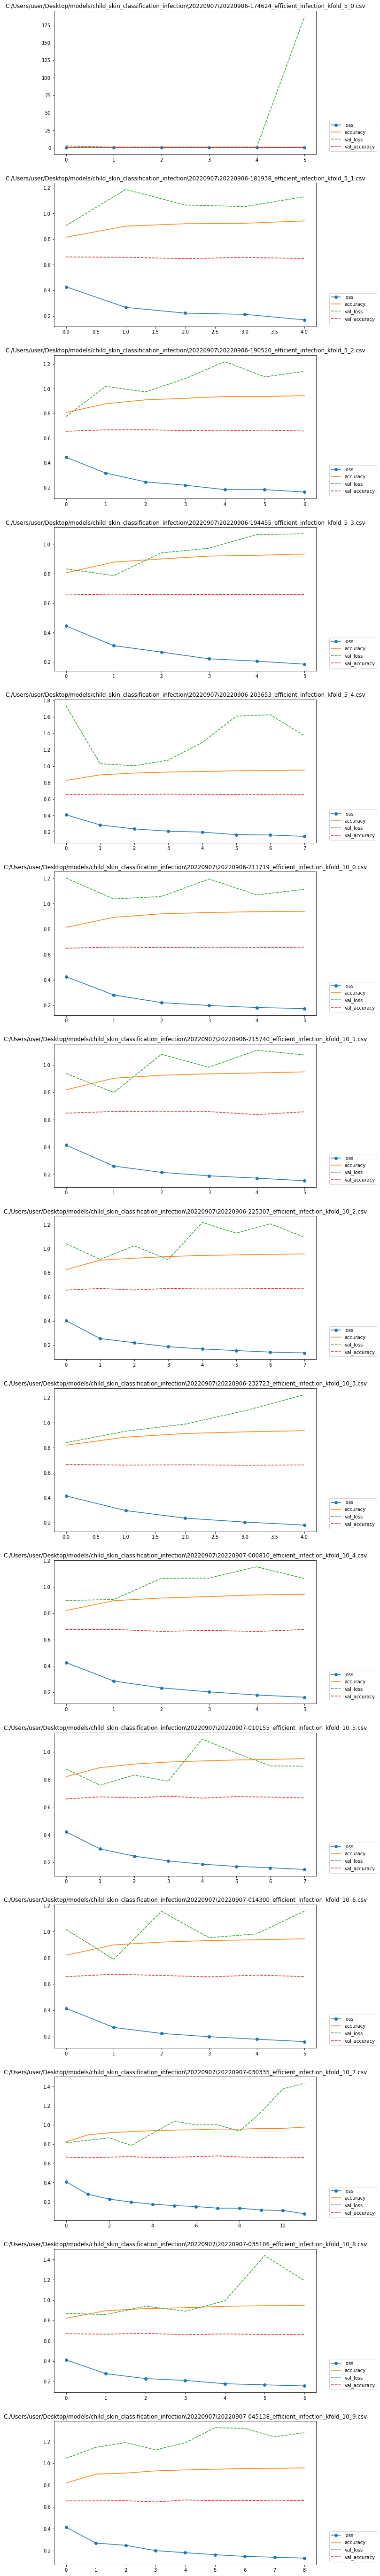

In [43]:
idx = 1
plt.figure(figsize=(10, 100))
for csv in glob(os.path.join(base_models_path, '20220907') + '/*.csv'): 
    df = pd.read_csv(csv) 
    
    # print(df)
    # print(idx)
    
    plt.subplot(15, 1, idx) 
    
    plt.plot(df['loss'], marker='o', label='loss')
    plt.plot(df['accuracy'], label='accuracy')
    plt.plot(df['val_loss'], '--', label='val_loss')
    plt.plot(df['val_accuracy'], '--', label='val_accuracy')
    plt.legend(loc=(1.05, 0.02))
    plt.title(csv)
    
    idx += 1
    

plt.show()    
    

In [4]:
for h5 in glob(os.path.join(base_models_path, '20220712') + '/*.h5'):
    model = keras.models.load_model(h5) 
    
    loss, acc = model.evaluate(test_images, test_labels, batch_size=32)
    print(f'file : {h5}  loss : {loss}  accuracy : {acc}')

1302/1302 [==============================] - 95s 68ms/step - loss: 0.5760 - accuracy: 0.8790
file : C:/Users/user/Desktop/models/child_skin_classification_infection\20220712\20220712-032221_efficientb4_infection_kfold_5_1.h5  loss : 0.5759674310684204  accuracy : 0.879020631313324
1302/1302 [==============================] - 90s 68ms/step - loss: 0.3513 - accuracy: 0.8781
file : C:/Users/user/Desktop/models/child_skin_classification_infection\20220712\20220712-113943_efficientb4_infection_kfold_5_0.h5  loss : 0.35130807757377625  accuracy : 0.8781325221061707
1302/1302 [==============================] - 91s 69ms/step - loss: 0.3435 - accuracy: 0.8862
file : C:/Users/user/Desktop/models/child_skin_classification_infection\20220712\20220712-162427_efficientb4_infection_kfold_5_0.h5  loss : 0.343458354473114  accuracy : 0.8861978054046631
1302/1302 [==============================] - 93s 69ms/step - loss: 0.3473 - accuracy: 0.8856
file : C:/Users/user/Desktop/models/child_skin_classificati

In [56]:
# model = keras.models.load_model(os.path.join(base_models_path, '20220710-043340_efficientb4_infection_kfold_0.h5'), custom_objects={'focal_loss_fixed' : tfa.losses.SigmoidFocalCrossEntropy()})
model = keras.models.load_model(os.path.join(base_models_path, '20220907', '20220907-010153_efficient_infection_kfold_10_5.h5'))

In [57]:
AUTOTUNE = tf.data.AUTOTUNE

all_dict, count_all_dict = dataset_generator.create_part_all_dict(dataset_path, 100, parameters.max_num, part='ETC')
 
test_images, test_labels = dataset_generator.create_test_list(all_dict, dataset_path=dataset_path, part='ETC') 

test_dataset = dataset_generator.create_dataset(test_images, test_labels) 

test_dataset = test_dataset.batch(parameters.num_batch, drop_remainder=True).prefetch(AUTOTUNE)

Non-infection found : 7025, Infection found : 757


In [58]:
model.evaluate(test_dataset)

675/675 [==============================] - 62s 90ms/step - loss: 1.1300 - tp: 340.0000 - fp: 420.0000 - tn: 13610.0000 - fn: 7230.0000 - accuracy: 0.6458 - precision: 0.4474 - recall: 0.0449 - auc: 0.5125 - prc: 0.3716


[1.1299885511398315,
 340.0,
 420.0,
 13610.0,
 7230.0,
 0.6458333134651184,
 0.44736841320991516,
 0.044914133846759796,
 0.5125330090522766,
 0.37155652046203613]

In [74]:
y_pred = [] 
y_true = [] 
threshold = 0.5

for img_batch, label_batch in test_dataset:
    y_true.append(label_batch) 
    
    preds = model.predict(img_batch) 
    # print(f'------------->{preds}')
    
    # y_pred.append(np.argmax(preds, axis=-1))
    # y_pred.append(preds) 
    
    preds[preds >= threshold] = 1 
    preds[preds < threshold] = 0
    y_pred.append(preds) 
    
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

------------->[[0.48131576]
 [0.5324375 ]
 [0.01675758]
 [0.0159961 ]
 [0.05680054]
 [0.01979258]
 [0.041348  ]
 [0.01819311]
 [0.0939495 ]
 [0.19848372]
 [0.00630191]
 [0.00552192]
 [0.02447096]
 [0.02954948]
 [0.02889178]
 [0.02954948]
 [0.02889178]
 [0.02954948]
 [0.02889178]
 [0.02954948]
 [0.02889178]
 [0.02954948]
 [0.03156446]
 [0.0204552 ]
 [0.04970456]
 [0.04070142]
 [0.03001916]
 [0.02856605]
 [0.12859301]
 [0.18598253]
 [0.01738453]
 [0.01788665]]
------------->[[0.8704814 ]
 [0.31660512]
 [0.01757816]
 [0.02108552]
 [0.12745637]
 [0.09915611]
 [0.01778045]
 [0.04421369]
 [0.02360513]
 [0.04421369]
 [0.02360513]
 [0.04421369]
 [0.02360513]
 [0.04421369]
 [0.02360513]
 [0.04421369]
 [0.20268685]
 [0.07923582]
 [0.02210545]
 [0.06509718]
 [0.06515364]
 [0.02325493]
 [0.3556388 ]
 [0.63177973]
 [0.03329094]
 [0.015971  ]
 [0.02194369]
 [0.02668481]
 [0.01516596]
 [0.01273271]
 [0.03764993]
 [0.03113729]]
------------->[[0.20102994]
 [0.114865  ]
 [0.20472847]
 [0.114865  ]
 [0.

KeyboardInterrupt: 

: 

In [ ]:
for c, p in zip(correct_labels, predicted_labels):
    if p >= 0.5:
        print(f'correct : {c}, predicted : {p}')

In [60]:
from sklearn.metrics import roc_curve
import sklearn

In [61]:
f1_score = sklearn.metrics.f1_score(correct_labels, predicted_labels)
precision = sklearn.metrics.precision_score(correct_labels, predicted_labels)
recall = sklearn.metrics.recall_score(correct_labels, predicted_labels)

f1_score, precision, recall

(0.0816326530612245, 0.4473684210526316, 0.04491413474240423)

In [62]:
from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve
print("accuracy_score: {}".format( accuracy_score(correct_labels, predicted_labels)))
print("precision_score: {}".format( precision_score(correct_labels, predicted_labels)))
# print("AUC: Area Under Curve: {}".format(roc_auc_score(y_true, y_pred_proba[:, 1])))

accuracy_score: 0.6458333333333334
precision_score: 0.4473684210526316


In [63]:
cm = sklearn.metrics.confusion_matrix(correct_labels, predicted_labels)

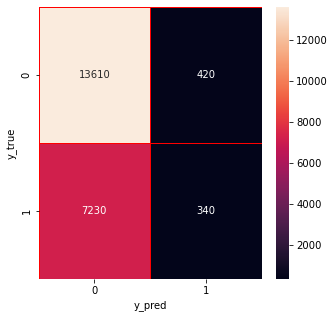

In [64]:
import seaborn as sns

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')

plt.show()

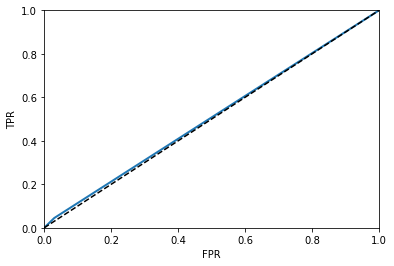

In [65]:
#roc curve 
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('FPR')    
    plt.ylabel('TPR')

fpr, tpr, thresholds = roc_curve(correct_labels, predicted_labels)
# fpr, tpr, thresholds
plot_roc_curve(fpr, tpr)

In [66]:
from sklearn.metrics import auc 

auc(fpr, tpr)

0.5074891414980731

In [21]:
model_files = glob(os.path.join(base_models_path, '20220906', '*.h5'))
model_files

['C:/Users/user/Desktop/models/child_skin_classification_infection\\20220906\\20220906-160050_efficient_infection_kfold_5_0.h5',
 'C:/Users/user/Desktop/models/child_skin_classification_infection\\20220906\\20220906-163424_efficient_infection_kfold_5_1.h5',
 'C:/Users/user/Desktop/models/child_skin_classification_infection\\20220906\\max_check_point_efficient_20220905-180304.h5',
 'C:/Users/user/Desktop/models/child_skin_classification_infection\\20220906\\max_check_point_efficient_20220905-195750.h5',
 'C:/Users/user/Desktop/models/child_skin_classification_infection\\20220906\\max_check_point_efficient_20220906-143706.h5',
 'C:/Users/user/Desktop/models/child_skin_classification_infection\\20220906\\max_check_point_efficient_20220906-160102.h5',
 'C:/Users/user/Desktop/models/child_skin_classification_infection\\20220906\\max_check_point_efficient_20220906-163440.h5',
 'C:/Users/user/Desktop/models/child_skin_classification_infection\\20220906\\min_check_point_efficient_20220905-1803

In [70]:
model1 = keras.models.load_model(os.path.join(base_models_path, '20220907', '20220906-174622_efficient_infection_kfold_5_0.h5'))
model2 = keras.models.load_model(os.path.join(base_models_path, '20220907', '20220906-181936_efficient_infection_kfold_5_1.h5'))
# model2 = keras.models.load_model('C:/Users/user/Desktop/models/child_skin_classification_infection\\20220906\\max_check_point_efficient_20220905-180304.h5')
# model3 = keras.models.load_model('C:/Users/user/Desktop/models/child_skin_classification_infection\\20220906\\max_check_point_efficient_20220905-195750.h5')

In [71]:
models = [model1, model2]

In [72]:
def ensemble(models, model_input): 
    outputs = [model.outputs[0] for model in models]
    # print(outputs)
    y = tf.keras.layers.Concatenate(axis=-1)(outputs) 
    
    model = tf.keras.Model(model_input, y)
    
    return model


model_input = tf.keras.Input(shape=(parameters.num_res, parameters.num_res, 3))
model = ensemble(models, model_input) 

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'") at layer "efficientnetb4". The following previous layers were accessed without issue: []